# 이변량_범주(숫자) vs 범주

# 1.환경준비

* 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> 타이타닉 생존자  


In [3]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


# 2.범주 --> 범주

## (1) 교차표(pd.crosstab)

범주 vs 범주 를 비교하고 분석하기 위해서는 먼저 **교차표**를 만들어야 합니다.

* pd.crosstab(행, 열)

In [4]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(titanic['Survived'], titanic['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


* pd.crosstab(행, 열, normalize =   )

<img src='https://github.com/DA4BAM/image/blob/main/crosstab.png?raw=true' width=700/>


In [5]:
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'columns')

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


In [6]:
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'index')

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


In [8]:
pd.crosstab(titanic['Survived'], titanic['Pclass'], normalize = 'all')

Pclass,1,2,3
Survived,,,
0,0.089787,0.108866,0.417508
1,0.152637,0.097643,0.133558


## (2) 시각화
* mosaic
* (참조) 100% Stacked Bar


1) Pclass --> Survived

* mosaic plot
    * mosaic(dataframe, [ feature, target])

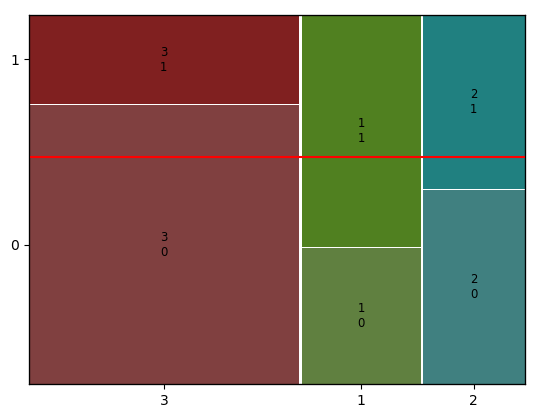

In [9]:
# Pclass별 생존여부를 mosaic plot으로 그려 봅시다.
mosaic(titanic, [ 'Pclass','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

① X축 길이는 각 객실등급별 승객비율을 나타냅니다.  
② 그 중 3등급 객실에 대해서 보면, y축의 길이는, 3등급 객실 승객 중에서 사망, 생존 비율을 의미합니다.

* 100% Stacked Bar
    * 먼저 crosstab으로 집계 : pd.crosstab(**feature**, **target**, normalize = **'index'**)
    * .plot.bar(stacked = true)
    * 전체 평균선 : plt.axhline()

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


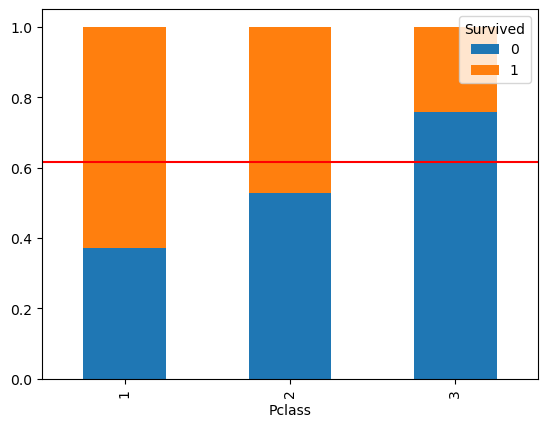

In [11]:
# 참조
temp = pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

비율만 비교하므로 양에 대한 비교는 할 수 없다!

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

아래 관계에 대해서 교차표와 시각화(mosaic)를 수행하고, feature와 target 간에 관계가 있는지 분석해 봅시다.


In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


* [문1] Sex --> Survived

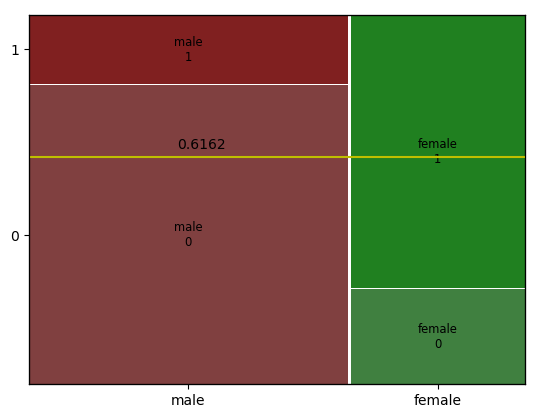

In [30]:
mosaic(titanic, ['Sex', 'Survived'])
plt.axhline(1 - titanic['Survived'].mean(), color = 'y')
plt.text(0.3, 1 - titanic['Survived'].mean() + 0.02, round(1 - titanic['Survived'].mean(), 4))
plt.show()

    Feature('Pcalss')와 Target('Survived')와 관계가 크다.

* [문2] Embarked --> Survived

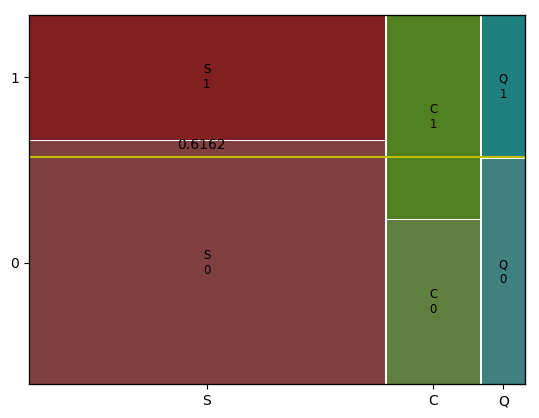

In [29]:

mosaic(titanic, ['Embarked', 'Survived'])
plt.axhline(1 - titanic['Survived'].mean(), color = 'y')
plt.text(0.3, 1 - titanic['Survived'].mean() + 0.02, round(1 - titanic['Survived'].mean(), 4))
plt.show()

    Feature('Embared')와 Target('Survived')는 약간 관계가 있다.

* [문3] Title --> Survived

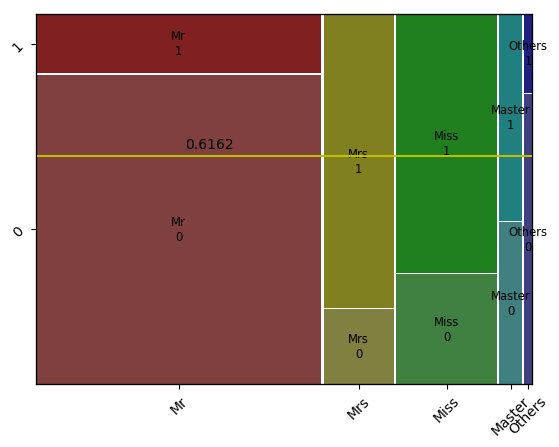

In [28]:

mosaic(titanic, ['Title', 'Survived'], label_rotation= 45)
plt.axhline(1 - titanic['Survived'].mean(), color = 'y')
plt.text(0.3, 1 - titanic['Survived'].mean() + 0.02, round(1 - titanic['Survived'].mean(), 4))
plt.show()

In [19]:
titanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

    Feature('Mr', 'Mrs', 'Miss', 'Master', 'Others')와 Target('Survived')은 관계가 있다.

## (3) 수치화 : 카이제곱검정

* 카이제곱검정 : 범주형 변수들 사이에 어떤 관계가 있는지, 수치화 하는 방법

![image.png](https://github.com/DA4BAM/image/blob/main/%EC%B9%B4%EC%9D%B4%EC%A0%9C%EA%B3%B1%20%ED%86%B5%EA%B3%84%EB%9F%89.png?raw=true)

* 카이 제곱 통계량은
    * 클수록 기대빈도로부터 실제 값에 차이가 크다는 의미.
    * 계산식으로 볼 때, 범주의 수가 늘어날 수록 값은 커지게 되어 있음.
    * 보통, 자유도의 2~3배 보다 크면, 차이가 있다고 본다. 

* 범주형 변수의 자유도 : 범주의 수 - 1

* 카이제곱검정에서는
    * x 변수의 자유도 × y 변수의 자유도
    * 예 : Pclass --> Survived
        * Pclass : 범주가 3개, Survived : 2개
        * (3-1) * (2-1) = 2
        * 그러므로, 2의 2 ~ 3배인 4 ~ 6 보다 카이제곱 통계량이 크면, 차이가 있다고 볼수 있음.


* 타이타닉 데이터에서 객실등급과 생존여부 간의 카이제곱 검정을 수행해 봅시다.

In [31]:
pd.crosstab(titanic['Survived'], titanic['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [33]:
# 1) 먼저 교차표 집계
table = pd.crosstab(titanic['Survived'], titanic['Pclass'])
print(table)
print('-' * 50)

# 2) 카이제곱검정
spst.chi2_contingency(table)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
--------------------------------------------------


Chi2ContingencyResult(statistic=102.88898875696056, pvalue=4.549251711298793e-23, dof=2, expected_freq=array([[133.09090909, 113.37373737, 302.53535354],
       [ 82.90909091,  70.62626263, 188.46464646]]))

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

다음의 관계에 대해 수치화 해 봅시다.

* [문1] Sex --> Survived

In [64]:
table2 = pd.crosstab(titanic['Survived'], titanic['Sex'])
print(table2)
print('-' * 50)

tmp = spst.chi2_contingency(table2)
# type(spst.chi2_contingency(table2))
print(f'statistic = {tmp[0]} \npvalue = {tmp[1]} \ndof = {tmp[2]} \nexpected_freq =\n {tmp[3]}')

Sex       female  male
Survived              
0             81   468
1            233   109
--------------------------------------------------
statistic = 260.71702016732104 
pvalue = 1.1973570627755645e-58 
dof = 1 
expected_freq =
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


* [문2] Embarked --> Survived

In [62]:
table3 = pd.crosstab(titanic['Survived'], titanic['Embarked'])
print(table3)
print('-' * 50)

tmp = spst.chi2_contingency(table3)
print(f'statistic = {tmp[0]} \npvalue = {tmp[1]} \ndof = {tmp[2]} \nexpected_freq =\n {tmp[3]}')

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219
--------------------------------------------------
statistic = 25.964452881874784 
pvalue = 2.3008626481449577e-06 
dof = 2 
expected_freq =
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


* [문3] Title --> Survived

In [67]:
table4 = pd.crosstab(titanic['Title'], titanic['Survived'])
print(table4)
print('-' * 50)
table4_1 = pd.crosstab(titanic['Survived'], titanic['Title'])
print(table4_1)
print('-' * 50)

tmp = spst.chi2_contingency(table4)
print(f'statistic = {tmp[0]} \npvalue = {tmp[1]} \ndof = {tmp[2]} \nexpected_freq =\n {tmp[3]}')
print('-' * 50)

tmp = spst.chi2_contingency(table4_1)
print(f'statistic = {tmp[0]} \npvalue = {tmp[1]} \ndof = {tmp[2]} \nexpected_freq =\n {tmp[3]}')

Survived    0    1
Title             
Master     18   23
Miss       55  130
Mr        439   84
Mrs        26  102
Others     11    3
--------------------------------------------------
Title     Master  Miss   Mr  Mrs  Others
Survived                                
0             18    55  439   26      11
1             23   130   84  102       3
--------------------------------------------------
statistic = 289.1953165452417 
pvalue = 2.318405007221846e-61 
dof = 4 
expected_freq =
 [[ 25.26262626  15.73737374]
 [113.98989899  71.01010101]
 [322.25252525 200.74747475]
 [ 78.86868687  49.13131313]
 [  8.62626263   5.37373737]]
--------------------------------------------------
statistic = 289.1953165452417 
pvalue = 2.318405007221846e-61 
dof = 4 
expected_freq =
 [[ 25.26262626 113.98989899 322.25252525  78.86868687   8.62626263]
 [ 15.73737374  71.01010101 200.74747475  49.13131313   5.37373737]]


# 3.숫자 --> 범주

## (1) 시각화

* 히스토그램을 Survived로 나눠서 그려봅시다.

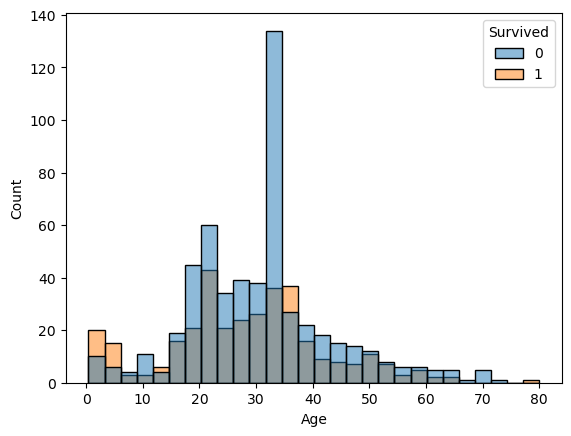

In [68]:
sns.histplot(x='Age', data = titanic, hue = 'Survived')
plt.show()

* kdeplot을 그려봅시다.  
* 두가지 방법이 있습니다.
    * ① kdeplot(   , hue = 'Survived') 
        * 생존여부의 비율이 유지된 채로 그려짐
        * 두 그래프의 아래 면적의 합이 1
    * ② kdeplot(   , hue = 'Survived', common_norm = False)
        * 생존여부 각각 아래 면적의 합이 1인 그래프
    * ③ kdeplot(   , hue = 'Survived', multiple = 'fill')
        * 나이에 따라 생존여부 **비율**을 비교해볼 수 있음. (양의 비교가 아닌 비율!)


① kdeplot( , hue = 'Survived)

* common_norm = True (기본값)

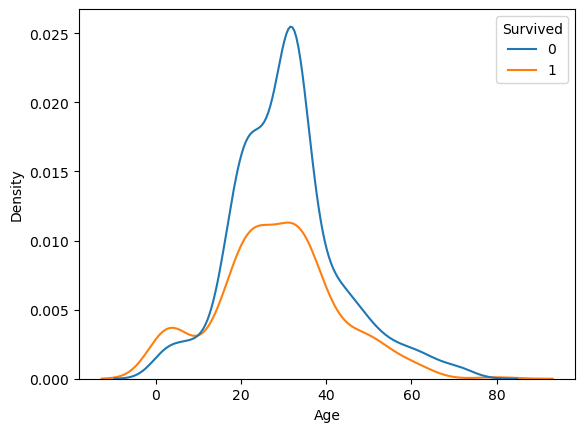

In [69]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived')
plt.show()

② kdeplot( , hue = 'Survived, common_norm = False)

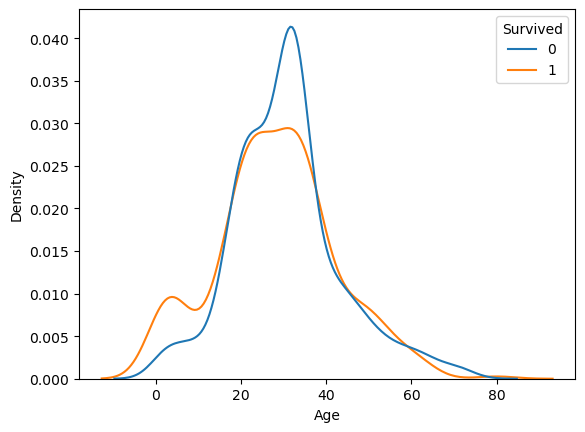

In [70]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived', 
            common_norm = False)
plt.show()

③ multiple = 'fill' 옵션

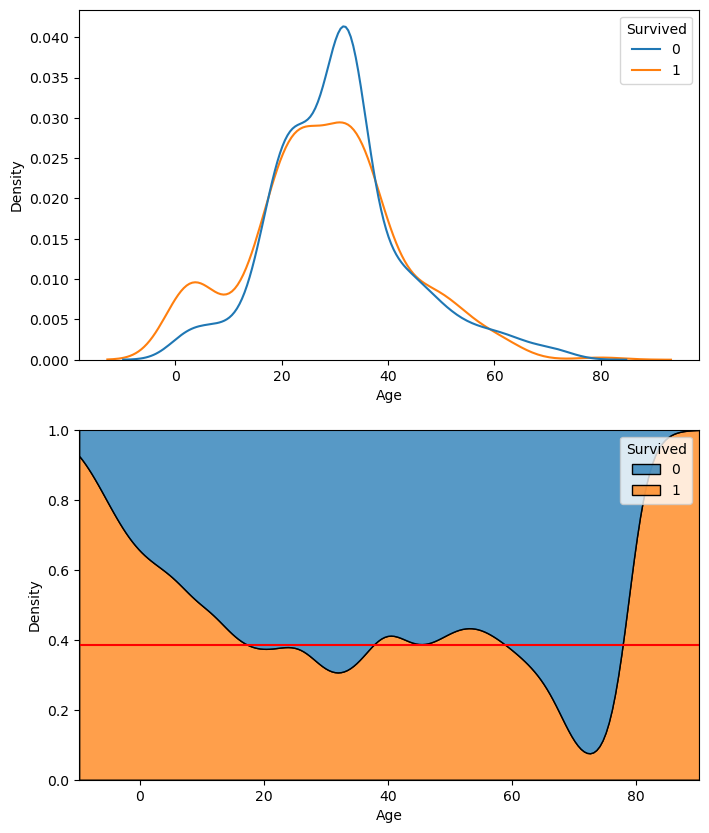

In [73]:
plt.figure(figsize= (8, 10))

plt.subplot(2, 1, 1)
sns.kdeplot(x='Age', data = titanic, hue ='Survived', 
            common_norm = False)
plt.subplot(2, 1, 2)
sns.kdeplot(x='Age', data = titanic, hue ='Survived'
            , multiple = 'fill')

plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

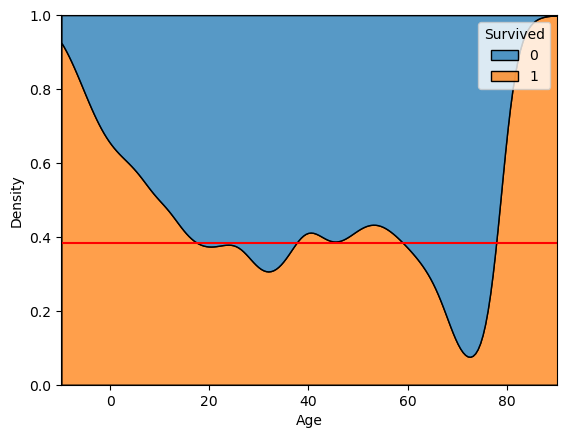

In [71]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived'
            , multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

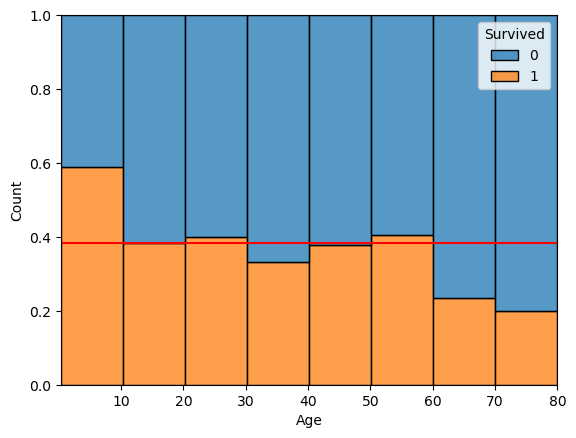

In [75]:
sns.histplot(x='Age', data = titanic, bins = 8
             , hue ='Survived', multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

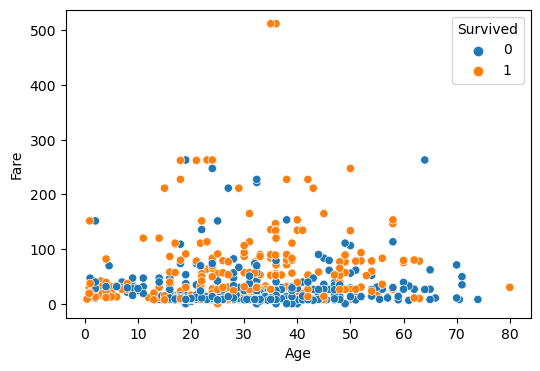

In [78]:
plt.figure(figsize= (6, 4))
sns.scatterplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Survived')
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

다음의 관계에 대해 시각화 해 봅시다.

* [문1] Fare(운임) --> Survived

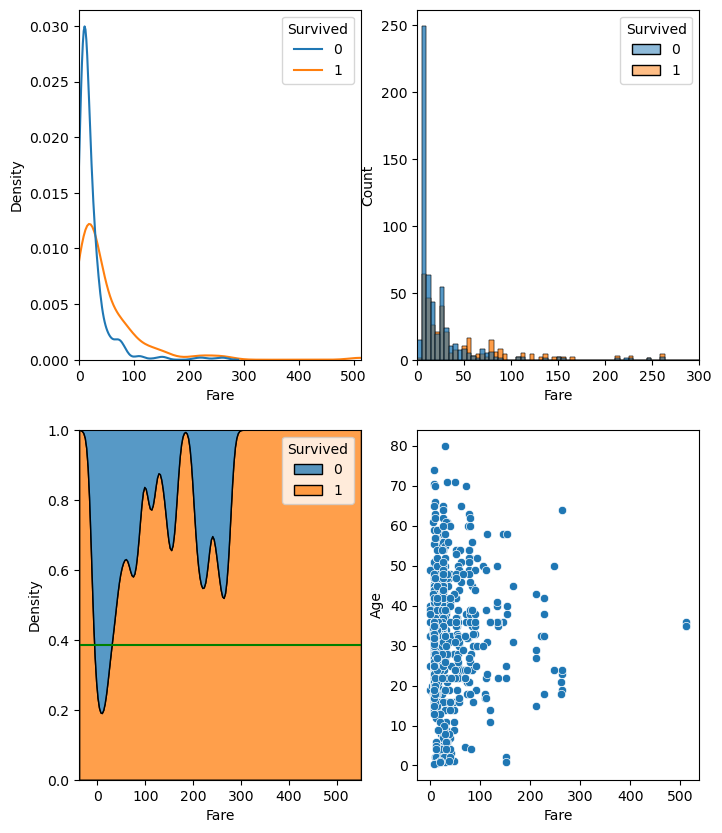

In [95]:
plt.figure(figsize= (8, 10))

plt.subplot(2, 2, 1)
sns.kdeplot(x='Fare', data = titanic, hue ='Survived', 
            common_norm = False)
plt.xlim(0, titanic['Fare'].max()+1)
plt.subplot(2, 2, 3)
sns.kdeplot(x='Fare', data = titanic, hue ='Survived'
            , multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'g')

plt.subplot(2, 2, 2)
sns.histplot(x='Fare', data = titanic, hue = 'Survived')
plt.xlim(0, 300)

plt.subplot(2, 2, 2)
sns.histplot(x='Fare', data = titanic, hue = 'Survived')

plt.subplot(2, 2, 4)
sns.scatterplot(x = 'Fare', y = 'Age', data = titanic)

plt.show()